<a href="https://colab.research.google.com/github/twsyas/machine_learning-course/blob/main/tratamentoeclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploração análise e tratamento dos dados: projeto previsão de doenças cardíacas

Objetivo: desenvolver um algoritmo de Machine Learning para prever a tendência de uma pessoa de desenvolver algum tipo de doença cardíaca com base nos fatores clínicos e laboratoriais de referência.

## Importanto bibliotecas e lendo os dados

In [2]:
import numpy as np
import pandas as pd

In [9]:
data = pd.read_csv('/content/heart.csv',
                   sep = ',',
                   encoding = 'iso-8859-1') #codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

## Explorando os dados

In [6]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [11]:
data.shape

(918, 12)

## Análise das variáveis

### por idade

In [12]:
data['Age'].value_counts()

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

In [14]:
data['Age'].value_counts().sort_index() #colocar em ordem crescente

28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: Age, dtype: int64

In [15]:
import plotly.express as px

In [17]:
hist1 = px.histogram(data, x = 'Age', nbins = 60) #nbins = largura das colunas
hist1.update_layout(width = 800, height = 500, title_text = 'Distribuição das idades')
hist1.show()

In [18]:
import seaborn as sns

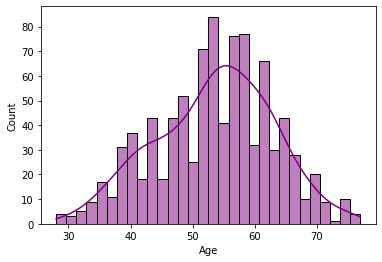

In [37]:
sns.histplot(data, x = 'Age', bins = 30, color = 'purple', kde = True, stat = "count") #bins = largura da coluna; kde = linha;

### por sexo

In [22]:
data['Sex'].value_counts().sort_index()

F    193
M    725
Name: Sex, dtype: int64

In [23]:
hist2 = px.histogram(data, x = 'Sex', nbins = 60) #nbins = largura das colunas
hist2.update_layout(width = 800, height = 500, title_text = 'Distribuição dos sexos')
hist2.show()

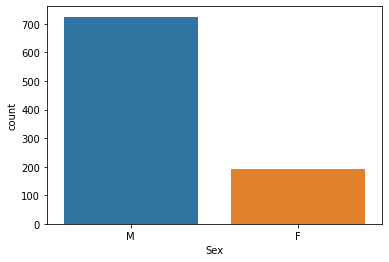

In [25]:
sns.countplot(data = data, x = 'Sex')

### CHEST PAIN TYPE - Tipo de dor no peito

In [26]:
data['ChestPainType'].value_counts() #ASY = Assintomático; NAP = Dor não anginosa; ATA = 

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

ASY = Assintomático; NAP = Dor não anginosa; ATA = Angina atípica; TA: Angina típica.

 ANGINA:: DOR NO PEITO CAUSADA PELA DIMINUIÇÃO DO FLUXO DE SANGUE NO CORAÇÃO

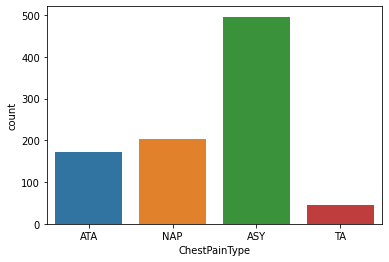

In [27]:
sns.countplot(data = data, x = 'ChestPainType')

### RESTING BP (BLOOD PRESSURE): pressão sanguinea em repouso em mmHg (sistólica)

In [30]:
data.RestingBP.value_counts().sort_index() #RestingBP é uma variável númerica contínua  

0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: RestingBP, Length: 67, dtype: int64

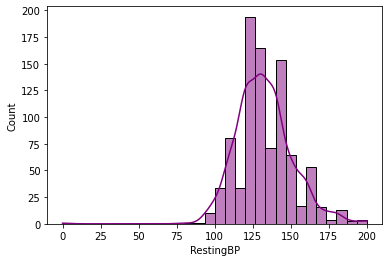

In [35]:
sns.histplot(data, x = 'RestingBP', bins = 30, color = 'purple', kde = True, stat = "count")

### CHOLESTEROL: colesterol sérico em (mg/dl)

In [34]:
data.Cholesterol.value_counts().sort_index()

0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

coresterol = 0??

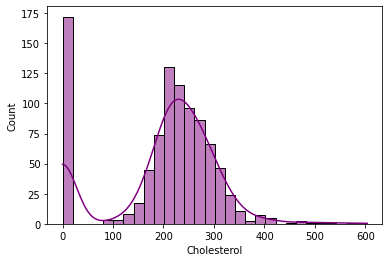

In [36]:
sns.histplot(data, x = 'Cholesterol', bins = 30, color = 'purple', kde = True, stat = "count")

### FASTING BS (BLOOD SUGAR): açucar no sangue em jejum (mg/dl)

In [43]:
data.FastingBS.value_counts().sort_index() #0: <120mg/dl - não diabéticos; 1: >120 mg/dl - diabéticos | variável categorica ordinal

0    704
1    214
Name: FastingBS, dtype: int64

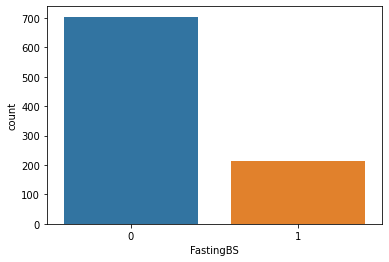

In [42]:
sns.countplot(x = 'FastingBS', data = data)

### RESTING ECG: eletrocardiograma em repouso

In [44]:
data.RestingECG.value_counts().sort_index()

LVH       188
Normal    552
ST        178
Name: RestingECG, dtype: int64

LVH: Hipertrofia venticular esquerda;
NORMAL: Normal;
ST: Anormalidade da onda ST-T

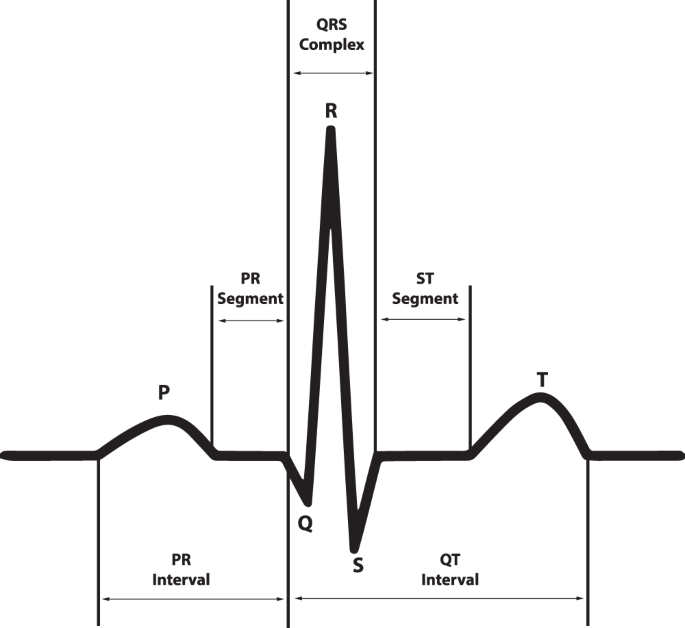 

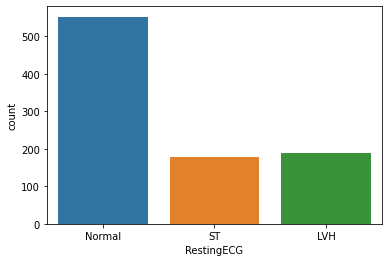

In [47]:
sns.countplot(data = data, x = 'RestingECG')

### MAX HR (HEART RATE) = frequência cardíaca máxima

In [51]:
data.MaxHR.value_counts().sort_index()

60     1
63     1
67     1
69     1
70     1
      ..
190    2
192    1
194    1
195    1
202    1
Name: MaxHR, Length: 119, dtype: int64

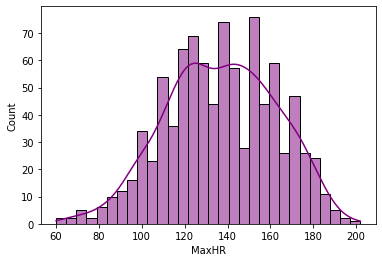

In [49]:
sns.histplot(data, x = 'MaxHR', bins = 30, color = 'purple', kde = True, stat = "count")

### EXERCISE ANGINA: Angina induzida por exercícios